# AIDM7330 Quiz 3

 student's details:
 
 + Name: Chen Xiaoqi
 + Student Id: 20465106 

### Exercises No.1
#### Method1

In [121]:
import requests
import pandas as pd
import bs4 as bs

In [122]:
#Use requests function to get the HTML webpage
source = requests.get("https://www.hko.gov.hk/en/cis/normal/1981_2010/dnormal10.htm").text

In [123]:
#Read in source.content to beautifulsoup 
soup = bs.BeautifulSoup(source, features='html.parser') 

In [124]:
#readable
print(soup.prettify()) 

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Daily Normal of Meteorological Elements for Hong Kong, October 1981-2010
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="Daily Normal of Meteorological Elements for Hong Kong, October 1981-2010" name="keywords"/>
  <meta content="Daily Normal of Meteorological Elements for Hong Kong, October 1981-2010" name="description"/>
  <meta content="2018123100000007201" name="recordId"/>
  <meta content="en" name="lang"/>
  <meta content="468280339992518" property="fb:app_id">
   <meta content="website" property="og:type">
    <meta content="Daily Normal of Meteorological Elements for Hong Kong, October 1981-2010" property="og:title">
     <meta content="Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec Month Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec The below figures represent daily" property=

In [125]:
#Use find_all function to get the table to table1
table1 = soup.find_all('table')

In [126]:
#From the table1, I found the imformation I need was in attribute='tr' and 'style'
#I use find.all function to get the 'tr' and 'style' and go back to the list
rows_for_table1 = table1[0].find_all('tr', style = 'border:1px solid;text-align:center;')
#print(rows_for_table1)

In [127]:
#creat every headers list
date_list = []                        
press_list = []                      
temp_max_list = []                    
temp_mean_list = []                    
temp_min_list = []                     
wet_list = []                         
dew_list = []                         
rh_list = []                          
rain_list = []                        
cloud_list = []  

In [128]:
for row in rows_for_table1:
    date = row.find('td', headers='date').text
    press = row.find('td', headers='press').text
    tempmax = row.find('td', headers='temp tmax').text
    tempmean = row.find('td', headers='temp tmean').text
    tempmin = row.find('td', headers='temp tmin').text
    wet = row.find('td', headers='wet').text
    dew = row.find('td', headers='dew').text
    rh = row.find('td', headers='rh').text
    rain = row.find('td', headers='rain').text
    cloud = row.find('td', headers='cloud').text
    
    date_list.append(date)
    press_list.append(press)
    temp_max_list.append(tempmax)
    temp_mean_list.append(tempmean)
    temp_min_list.append(tempmin)
    wet_list.append(wet)
    dew_list.append(dew)
    rh_list.append(rh)
    rain_list.append(rain)
    cloud_list.append(cloud)

    

In [129]:
print(date_list)
print(press_list)
print(temp_max_list)
print(temp_mean_list)
print(wet_list)
print(dew_list)
print(rh_list)
print(rain_list)
print(cloud_list)

['1 Oct', '2 Oct', '3 Oct', '4 Oct', '5 Oct', '6 Oct', '7 Oct', '8 Oct', '9 Oct', '10 Oct', '11 Oct', '12 Oct', '13 Oct', '14 Oct', '15 Oct', '16 Oct', '17 Oct', '18 Oct', '19 Oct', '20 Oct', '21 Oct', '22 Oct', '23 Oct', '24 Oct', '25 Oct', '26 Oct', '27 Oct', '28 Oct', '29 Oct', '30 Oct', '31 Oct']
['1012.0', '1012.3', '1012.4', '1012.5', '1012.5', '1012.6', '1012.8', '1013.0', '1013.3', '1013.5', '1013.7', '1013.7', '1013.8', '1013.8', '1013.8', '1014.0', '1014.2', '1014.3', '1014.4', '1014.6', '1014.8', '1015.0', '1015.1', '1015.2', '1015.3', '1015.4', '1015.6', '1015.8', '1016.1', '1016.4', '1016.7']
['29.1', '29.1', '29.1', '29.0', '28.9', '28.8', '28.7', '28.6', '28.5', '28.5', '28.4', '28.4', '28.3', '28.2', '28.1', '27.9', '27.8', '27.7', '27.5', '27.3', '27.2', '27.1', '27.0', '26.9', '26.8', '26.6', '26.5', '26.3', '26.2', '26.1', '25.8']
['26.8', '26.8', '26.8', '26.7', '26.6', '26.5', '26.4', '26.3', '26.3', '26.2', '26.2', '26.1', '26.1', '26.0', '25.9', '25.7', '25.6', '

### Table 1

In [130]:
TABLE = pd.DataFrame({
    'Date':date_list,
    'Mean press':press_list,
    'Air Temperature Mean Maximum(deg.C)':temp_max_list,
    'Air Temperature Mean(deg.C)':temp_mean_list,
    'Air Temperature Mean Minimum(deg.C)':temp_min_list,
    'Wet Bulb(deg.C)':wet_list,
    'Dew Point(deg.C)':dew_list,
    'Relative Humidity(%)':rh_list,
    'Mean Daily Rainfall(mm)': rain_list,
    'Amount of Cloud(%)': cloud_list,
})

In [131]:
TABLE

,Date,Mean press,Air Temperature Mean Maximum(deg.C),Air Temperature Mean(deg.C),Air Temperature Mean Minimum(deg.C),Wet Bulb(deg.C),Dew Point(deg.C),Relative Humidity(%),Mean Daily Rainfall(mm),Amount of Cloud(%)
0,1 Oct,1012.0,29.1,26.8,25.1,23.7,22.3,77,6.0,64
1,2 Oct,1012.3,29.1,26.8,25.1,23.7,22.1,76,4.3,63
2,3 Oct,1012.4,29.1,26.8,25.0,23.6,21.9,76,5.8,62
3,4 Oct,1012.5,29.0,26.7,24.9,23.4,21.7,75,6.5,61
4,5 Oct,1012.5,28.9,26.6,24.8,23.2,21.4,74,5.8,60
5,6 Oct,1012.6,28.8,26.5,24.7,23.0,21.2,74,4.6,59
6,7 Oct,1012.8,28.7,26.4,24.5,22.8,20.9,73,4.4,59
7,8 Oct,1013.0,28.6,26.3,24.4,22.7,20.7,73,2.7,57
8,9 Oct,1013.3,28.5,26.3,24.5,22.7,20.8,73,2.3,57
9,10 Oct,1013.5,28.5,26.2,24.5,22.8,20.9,74,2.6,57


In [132]:
obs_list = ['Observed at']
for i in list(range(1,10)):
    obs_list.append('Hong Kong Observatory')

In [133]:
TABLE.loc['31'] = obs_list
TABLE

,Date,Mean press,Air Temperature Mean Maximum(deg.C),Air Temperature Mean(deg.C),Air Temperature Mean Minimum(deg.C),Wet Bulb(deg.C),Dew Point(deg.C),Relative Humidity(%),Mean Daily Rainfall(mm),Amount of Cloud(%)
0,1 Oct,1012.0,29.1,26.8,25.1,23.7,22.3,77,6.0,64
1,2 Oct,1012.3,29.1,26.8,25.1,23.7,22.1,76,4.3,63
2,3 Oct,1012.4,29.1,26.8,25.0,23.6,21.9,76,5.8,62
3,4 Oct,1012.5,29.0,26.7,24.9,23.4,21.7,75,6.5,61
4,5 Oct,1012.5,28.9,26.6,24.8,23.2,21.4,74,5.8,60
5,6 Oct,1012.6,28.8,26.5,24.7,23.0,21.2,74,4.6,59
6,7 Oct,1012.8,28.7,26.4,24.5,22.8,20.9,73,4.4,59
7,8 Oct,1013.0,28.6,26.3,24.4,22.7,20.7,73,2.7,57
8,9 Oct,1013.3,28.5,26.3,24.5,22.7,20.8,73,2.3,57
9,10 Oct,1013.5,28.5,26.2,24.5,22.8,20.9,74,2.6,57


In [134]:
#TABLE.to_csv('../data/Oct Weather1.csv')

### TABLE2

##### Method2:
+ Use read_html of pandas to get the table from Html webpage

In [180]:
tables = pd.read_html('https://www.hko.gov.hk/en/cis/normal/1981_2010/dnormal10.htm')

In [181]:
df = tables[1]
tables[1]

Date Bright  Sunshine  Duration  (hours)  Figure  \
           Date Bright  Sunshine  Duration  (hours)  Figure   
0         1 Oct                                         5.6   
1         2 Oct                                         5.7   
2         3 Oct                                         5.9   
3         4 Oct                                         6.0   
4         5 Oct                                         6.2   
5         6 Oct                                         6.3   
6         7 Oct                                         6.3   
7         8 Oct                                         6.4   
8         9 Oct                                         6.4   
9        10 Oct                                         6.4   
10       11 Oct                                         6.3   
11       12 Oct                                         6.1   
12       13 Oct                                         5.9   
13       14 Oct                                         6.0   
14       15 Oct                                         6.0   
15       16 Oct                                         6.0   
16       17 Oct                                         6.2   
17       18 Oct                                         6.3   
18       19 Oct                                         6.2   
19       20 Oct                                         6.4   
20       21 Oct                                         6.7   
21       22 Oct                                         6.7   
22       23 Oct                                         6.7   
23       24 Oct                                         6.7   
24       25 Oct                                         6.4   
25       26 Oct                                         6.2   
26       27 Oct                                         6.0   
27       28 Oct                                         6.2   
28       29 Oct                                         6.3   
29       30 Oct                                         6.5   
30       31 Oct                                         6.5   
31  Observed at                                 King's Park   

                       Wind  Figure                      \
   Prevailing  Direction  (degrees) Mean  Speed  (km/h)   
0                               080                  27   
1                               080                  27   
2                               080                  27   
3                               080                  26   
4                               080                  24   
5                               090                  23   
6                               090                  23   
7                               090                  24   
8                               080                  25   
9                               080                  27   
10                              080                  28   
11                              080                  29   
12                              080                  29   
13                              080                  28   
14                              080                  28   
15                              080                  27   
16                              080                  27   
17                              080                  28   
18                              080                  28   
19                              080                  29   
20                              080                  29   
21                              080                  28   
22                              080                  28   
23                              080                  28   
24                              080                  28   
25                              080                  28   
26                              080                  28   
27                              080                  28   
28                              080                  28   
29                              080    

In [182]:
#tables[1].to_csv('../data/Oct Weather2.csv')

### Exercises No.2

### Describe
+ I ues the SeletorGadget find the Jan is belong to "li a".  Through the webpage's code I found that everymonth in the format of 'a' tag below the 'li calss' tag，use attributes 'href' to define hypertext transfer and the class=''Link Button"

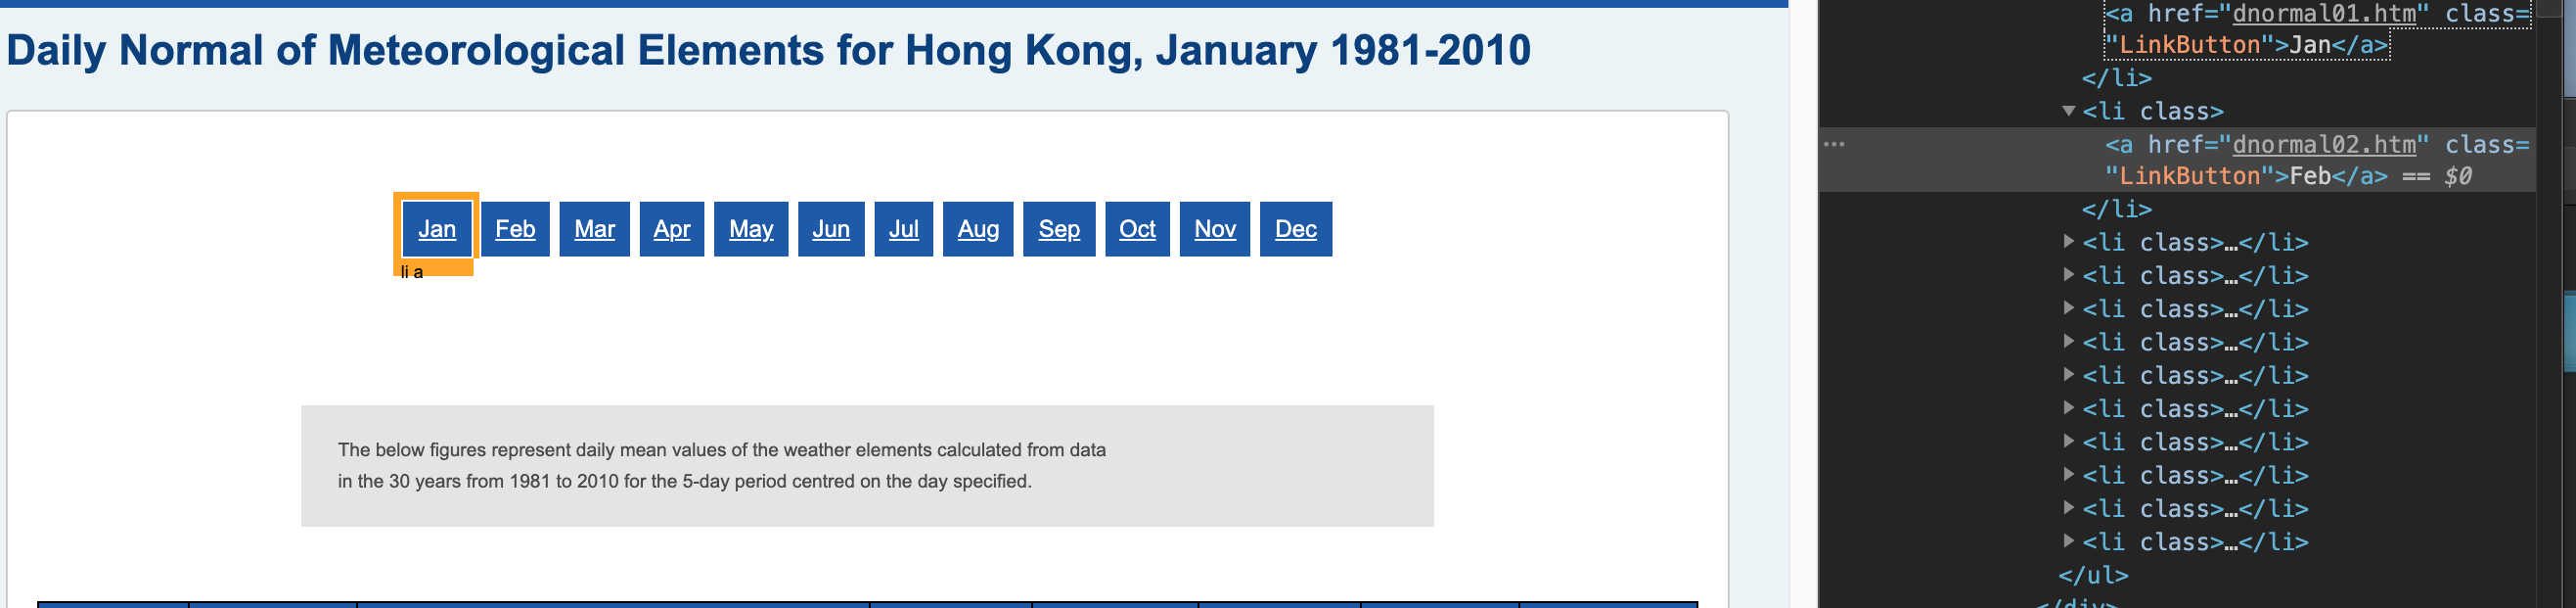

In [208]:
from time import sleep 
from time import time 
from random import randint 

sleep(randint(3, 10))

I can use find.all() to get them in a list. I can click on the Href and go directly to the January page.

In [207]:
hrefs = soup.find_all('a', class_= 'LinkButton')
for href in hrefs:
    link = href['href']
    url = f'https://www.hko.gov.hk/en/cis/normal/1981_2010/{link}'
    print(url)

https://www.hko.gov.hk/en/cis/normal/1981_2010/dnormal01.htm
https://www.hko.gov.hk/en/cis/normal/1981_2010/dnormal02.htm
https://www.hko.gov.hk/en/cis/normal/1981_2010/dnormal03.htm
https://www.hko.gov.hk/en/cis/normal/1981_2010/dnormal04.htm
https://www.hko.gov.hk/en/cis/normal/1981_2010/dnormal05.htm
https://www.hko.gov.hk/en/cis/normal/1981_2010/dnormal06.htm
https://www.hko.gov.hk/en/cis/normal/1981_2010/dnormal07.htm
https://www.hko.gov.hk/en/cis/normal/1981_2010/dnormal08.htm
https://www.hko.gov.hk/en/cis/normal/1981_2010/dnormal09.htm
https://www.hko.gov.hk/en/cis/normal/1981_2010/dnormal10.htm
https://www.hko.gov.hk/en/cis/normal/1981_2010/dnormal11.htm
https://www.hko.gov.hk/en/cis/normal/1981_2010/dnormal12.htm


In the above method, the first method, I defined a list of different data for each weather, pressure, etc., and then collected the data. Append to put the data in the list.